In [24]:
# 패키지 임포트
import numpy as np
import pandas as pd
import scipy.stats as ss
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
# !pip install plotly
# import plotly.offline as off
# import plotly.graph_objs as go
pd.set_option('display.max_columns', 500)

plt.rc("font", family="Malgun Gothic") # matplotlib 한글깨짐 방지

In [25]:
# 데이터 로드 
# 부동산 데이터
train_data=pd.read_csv('train_data.csv', encoding='utf-8')

In [4]:
train_data

,시군구,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,"130,000",4,1987,언주로 3
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,"117,000",2,1987,언주로 3
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,"130,000",1,1987,언주로 3
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,"139,500",2,1987,언주로 3
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,"107,500",5,1987,언주로 3
...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,"26,000",2,2003,동일로144길 74
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,"44,000",6,2007,봉화산로27가길 23
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,"54,800",5,2007,봉화산로27가길 23
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,"40,000",5,2007,봉화산로27가길 19


### 거래금액 컬럼
- 컬럼명 변경, 숫자형으로 변경
- 로그변환

In [26]:
#### 전처리
## 거래금액
# 거래금액 데이터 컬럼명 변경
train_data.rename(columns = {'거래금액(만원)':'거래금액'}, inplace=True)

# 거래금액 , 제거 후 숫자형 변환
train_data['거래금액'] = train_data['거래금액'].str.replace(',','').astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='거래금액', ylabel='Density'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


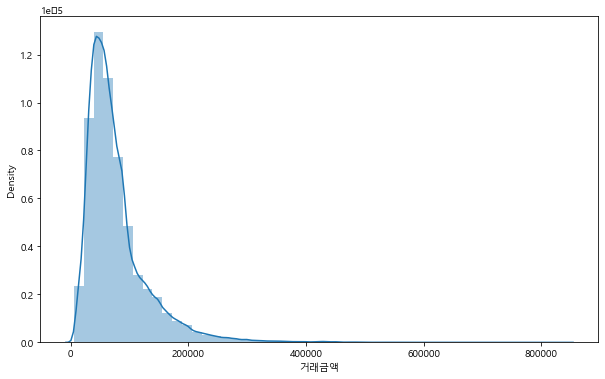

In [27]:
# 거래 가격 분포 확인
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(train_data["거래금액"])


In [28]:
# 거래 금액 로그변환
train_data['거래금액_로그'] = np.log1p(train_data['거래금액'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='거래금액_로그', ylabel='Density'>

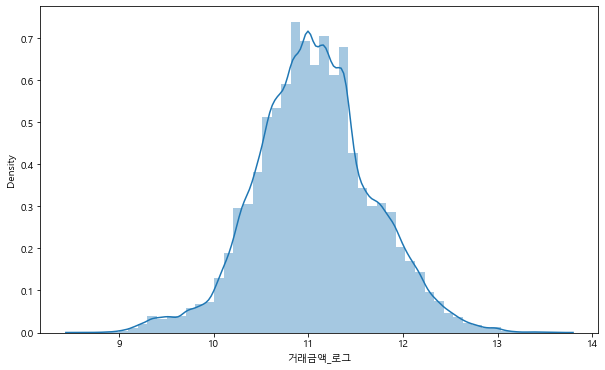

In [29]:
# 로그 거래 가격 분포 확인
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(train_data['거래금액_로그'])

### 시군구 컬럼
- 시, 구, 동으로 분리
- 인코딩

In [30]:
region_split = train_data['시군구'].str.split(' ', expand=True)
region_split.columns = ['시', '구', '동']

train_data = pd.concat([train_data, region_split], axis=1)
train_data

,시군구,단지명,전용면적(㎡),계약년월,거래금액,층,건축년도,도로명,거래금액_로그,시,구,동
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,11.775297,서울특별시,강남구,개포동
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,11.669938,서울특별시,강남구,개포동
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,11.775297,서울특별시,강남구,개포동
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,11.845827,서울특별시,강남구,개포동
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,11.585255,서울특별시,강남구,개포동
...,...,...,...,...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74,10.165890,서울특별시,중랑구,중화동
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23,10.691968,서울특별시,중랑구,중화동
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23,10.911464,서울특별시,중랑구,중화동
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19,10.596660,서울특별시,중랑구,중화동


In [31]:
# 타겟설정
target = '거래금액' 

In [36]:
# 구 별 가격 평균 인코딩
gu_mean = train_data.groupby('구')[target].mean()
# gu_mean
train_data['구_평균'] = train_data['구'].map(gu_mean)
train_data[['구', '구_평균']]

,구,구_평균
0,강남구,172391.946333
1,강남구,172391.946333
2,강남구,172391.946333
3,강남구,172391.946333
4,강남구,172391.946333
...,...,...
240916,중랑구,44998.326330
240917,중랑구,44998.326330
240918,중랑구,44998.326330
240919,중랑구,44998.326330


In [37]:
# 동별 가격 평균 top30 리스트 추출
top30_dong = train_data.groupby('동').mean().sort_values('거래금액', ascending=False)[:30].index

In [38]:
top30_dong

Index(['압구정동', '신문로2가', '반포동', '한남동', '대치동', '용산동5가', '서빙고동', '청담동', '도곡동',
       '잠원동', '주성동', '잠실동', '삼성동', '개포동', '청암동', '한강로3가', '홍파동', '하중동', '신천동',
       '평동', '회현동2가', '이촌동', '일원동', '여의도동', '신계동', '남대문로5가', '방배동', '보광동',
       '동빙고동', '한강로2가'],
      dtype='object', name='동')

In [39]:
# top30에 들어가면 동 이름 그대로 아니면 기타로 매핑
def top30(x):
    if x in top30_dong:
        return x
    else:
        return '기타'

In [40]:
# 매핑한 결과로 새로운 컬럼 생성
train_data['top30_동'] = train_data['동'].apply(top30)

In [41]:
train_data

,시군구,단지명,전용면적(㎡),계약년월,거래금액,층,건축년도,도로명,거래금액_로그,시,구,동,구_평균,top30_동
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,11.775297,서울특별시,강남구,개포동,172391.946333,개포동
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,11.669938,서울특별시,강남구,개포동,172391.946333,개포동
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,11.775297,서울특별시,강남구,개포동,172391.946333,개포동
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,11.845827,서울특별시,강남구,개포동,172391.946333,개포동
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,11.585255,서울특별시,강남구,개포동,172391.946333,개포동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74,10.165890,서울특별시,중랑구,중화동,44998.326330,기타
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23,10.691968,서울특별시,중랑구,중화동,44998.326330,기타
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23,10.911464,서울특별시,중랑구,중화동,44998.326330,기타
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19,10.596660,서울특별시,중랑구,중화동,44998.326330,기타


In [42]:
pd.DataFrame(train_data[['동', 'top30_동']].value_counts())[:60]

,,0
동,top30_동,
상계동,기타,9739
중계동,기타,5743
구로동,기타,4979
신정동,기타,4913
창동,기타,4527
봉천동,기타,4478
월계동,기타,3583
목동,기타,3571
미아동,기타,3443


In [43]:
# top30 컬럼의 동 별 가격 평균 인코딩
dong_mean = train_data.groupby('top30_동')[target].mean()
# dong_mean
train_data['동_평균'] = train_data['top30_동'].map(dong_mean)
train_data[['동', '동_평균']]

,동,동_평균
0,개포동,166112.063772
1,개포동,166112.063772
2,개포동,166112.063772
3,개포동,166112.063772
4,개포동,166112.063772
...,...,...
240916,중화동,66458.989444
240917,중화동,66458.989444
240918,중화동,66458.989444
240919,중화동,66458.989444


In [44]:
train_data

,시군구,단지명,전용면적(㎡),계약년월,거래금액,층,건축년도,도로명,거래금액_로그,시,구,동,구_평균,top30_동,동_평균
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,11.775297,서울특별시,강남구,개포동,172391.946333,개포동,166112.063772
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,11.669938,서울특별시,강남구,개포동,172391.946333,개포동,166112.063772
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,11.775297,서울특별시,강남구,개포동,172391.946333,개포동,166112.063772
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,11.845827,서울특별시,강남구,개포동,172391.946333,개포동,166112.063772
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,11.585255,서울특별시,강남구,개포동,172391.946333,개포동,166112.063772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74,10.165890,서울특별시,중랑구,중화동,44998.326330,기타,66458.989444
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23,10.691968,서울특별시,중랑구,중화동,44998.326330,기타,66458.989444
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23,10.911464,서울특별시,중랑구,중화동,44998.326330,기타,66458.989444
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19,10.596660,서울특별시,중랑구,중화동,44998.326330,기타,66458.989444


In [45]:
# gu_mean의 minmax 정규화
minmax_scaler = MinMaxScaler()
gu_mean_df = train_data[['구_평균']]
minmax_scaled_gu_mean = pd.DataFrame(minmax_scaler.fit_transform(gu_mean_df), columns=['gu_mean'])
train_data['구_평균'] = minmax_scaled_gu_mean

In [46]:
# dong_mean의 minmax 정규화
# minmax_scaler = MinMaxScaler()
dong_mean_df = train_data[['동_평균']]
minmax_scaled_dong_mean = pd.DataFrame(minmax_scaler.fit_transform(dong_mean_df), columns=['dong_mean'])
train_data['동_평균'] = minmax_scaled_dong_mean

In [47]:
'''
si, gu, dong, gu_mean, top_30_dong, dong_mean 컬럼 생성
'''

train_data

,시군구,단지명,전용면적(㎡),계약년월,거래금액,층,건축년도,도로명,거래금액_로그,시,구,동,구_평균,top30_동,동_평균
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.000000,개포동,0.458209
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,11.669938,서울특별시,강남구,개포동,1.000000,개포동,0.458209
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.000000,개포동,0.458209
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,11.845827,서울특별시,강남구,개포동,1.000000,개포동,0.458209
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,11.585255,서울특별시,강남구,개포동,1.000000,개포동,0.458209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74,10.165890,서울특별시,중랑구,중화동,0.030539,기타,0.000000
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23,10.691968,서울특별시,중랑구,중화동,0.030539,기타,0.000000
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23,10.911464,서울특별시,중랑구,중화동,0.030539,기타,0.000000
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19,10.596660,서울특별시,중랑구,중화동,0.030539,기타,0.000000


### 단지명 컬럼
- 인코딩

In [49]:
# 거래금액 컬럼 minmax scaling 수행
minmax_scaled_price = minmax_scale(train_data['거래금액'])

# train_df에 minmax scaled 거래금액 반영
train_data['scaled_거래금액'] = minmax_scaled_price

In [56]:
# 1. 브랜드 평판 top10 시공사에 대한 mean 인코딩
# top 10 시공사 아파트 여부를 나타내는 컬럼 생성
# 2021.09.16 시공사 브랜드평판 순위 참고 링크: http://brikorea.com/bbs/board.php?bo_table=rep_1&wr_id=701

'''
    case1. 평균값 인코딩
        case1-1. 전체 거래금액 컬럼 값을 minmax scale 수행 한 후 이에 대한 top10별 스케일된 평균 거래금액 도출
        case1-2. top10별로 거래금액 컬럼 값을 minmax scale 수행 한 후 이에 대한 평균 거래금액 도출
        
    case2. 원-핫 인코딩

    case3. smoothing, cv loop, expanding mean
'''

train_data['top10_시공사'] = '기타1'
top10_apt = ['힐스테이트', '자이', '롯데캐슬', '더샵', '푸르지오', 
            '래미안', '아이파크', 'sk|SK|에스케이', '이편한|e편한|e-편한', '더 플래티넘']

# top 10 시공사에 속해 있는 아파트면 해당 시공사 이름으로 top10 컬럼 값 할당
for brand in top10_apt:
    train_data.loc[train_data['단지명'].str.contains(brand), 'top10_시공사'] = brand

# top10 시공사에 속하는 아파트 단지 탐색
train_data['top10_시공사'].value_counts()

기타1             196333
래미안              14014
푸르지오              5775
힐스테이트             5547
이편한|e편한|e-편한      4479
자이                4211
롯데캐슬              3928
아이파크              3115
sk|SK|에스케이        2377
더샵                1142
Name: top10_시공사, dtype: int64

In [57]:
# top10 시공사 별 평균 거래금액 도출
top10_grouped_mean_price = train_data.groupby('top10_시공사').mean()['거래금액']
top10_mean_dict = top10_grouped_mean_price.to_dict()
top10_mean_dict

{'sk|SK|에스케이': 66391.12957509466,
 '기타1': 72015.6218109029,
 '더샵': 126580.55166374781,
 '래미안': 107767.14321392892,
 '롯데캐슬': 107670.10234215886,
 '아이파크': 106744.51524879615,
 '이편한|e편한|e-편한': 93578.87117660193,
 '자이': 128949.99501306104,
 '푸르지오': 84372.06060606061,
 '힐스테이트': 90688.18099873805}

In [58]:
# train_df에 top10별 평균 거래금액 반영
def get_mean(x):
    return top10_mean_dict.get(x)

train_data['top10_평균'] = train_data['top10_시공사'].apply(get_mean)
train_data.head()

,시군구,단지명,전용면적(㎡),계약년월,거래금액,층,건축년도,도로명,거래금액_로그,시,구,동,구_평균,top30_동,동_평균,scaled_거래금액,top10_시공사,top10_평균,top10_시공사_encode1,top10_시공사_encode2
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,11.669938,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.133717,기타1,72015.621811,0.079817,0.079817
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,11.845827,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.160676,기타1,72015.621811,0.079817,0.079817
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,11.585255,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.122334,기타1,72015.621811,0.079817,0.079817


In [59]:
# case1-1
# top10 그룹별 평균 scaled_거래금액 집계
top10_grouped_scaled_mean_price = train_data.groupby('top10_시공사').mean()['scaled_거래금액']
top10_scaled_mean_dict = top10_grouped_scaled_mean_price.to_dict()

print(top10_scaled_mean_dict)

# train_df에 top10별 스케일된 평균 거래금액 반영
def get_scaled_mean1(x):
    return top10_scaled_mean_dict.get(x)

train_data['top10_시공사_encode1'] = train_data['top10_시공사'].apply(get_scaled_mean1)
train_data.head()

{'sk|SK|에스케이': 0.07307827650981867, '기타1': 0.0798174236890761, '더샵': 0.14519596413101826, '래미안': 0.12265413756761195, '롯데캐슬': 0.12253786525540243, '아이파크': 0.12142884645194843, '이편한|e편한|e-편한': 0.10565405125401621, '자이': 0.14803498084478917, '푸르지오': 0.09462264630488931, '힐스테이트': 0.10219048765724667}


,시군구,단지명,전용면적(㎡),계약년월,거래금액,층,건축년도,도로명,거래금액_로그,시,구,동,구_평균,top30_동,동_평균,scaled_거래금액,top10_시공사,top10_평균,top10_시공사_encode1,top10_시공사_encode2
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,11.669938,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.133717,기타1,72015.621811,0.079817,0.079817
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,11.845827,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.160676,기타1,72015.621811,0.079817,0.079817
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,11.585255,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.122334,기타1,72015.621811,0.079817,0.079817


In [60]:
# case1-2

# top10 카테고리에 속한 거래금액 탐색 후
# 각 카테고리 별 minmax 스케일링 수행하고
# 이에 대한 평균 값 도출
top10_minmax_scaled_mean_dict = {}
for top10_name in top10_mean_dict.keys():
    top10_price = train_data[train_data['top10_시공사'] == top10_name]['거래금액']
    top10_minmax_scaled_price = np.array(minmax_scale(top10_price))
    top10_minmax_scaled_mean_dict[top10_name] = np.mean(top10_minmax_scaled_price)

print(top10_minmax_scaled_mean_dict)

# train_df에 top10별 minmax scale된 평균 거래금액 반영
def get_scaled_mean2(x):
    return top10_minmax_scaled_mean_dict.get(x)

train_data['top10_시공사_encode2'] = train_data['top10_시공사'].apply(get_scaled_mean2)
train_data.head()

{'sk|SK|에스케이': 0.10876102884906268, '기타1': 0.0798174236890761, '더샵': 0.24134448297377306, '래미안': 0.15944765832779134, '롯데캐슬': 0.22803240252251367, '아이파크': 0.12986875219829297, '이편한|e편한|e-편한': 0.21729540571254638, '자이': 0.24293003404860947, '푸르지오': 0.243647790901819, '힐스테이트': 0.20650051420096036}


,시군구,단지명,전용면적(㎡),계약년월,거래금액,층,건축년도,도로명,거래금액_로그,시,구,동,구_평균,top30_동,동_평균,scaled_거래금액,top10_시공사,top10_평균,top10_시공사_encode1,top10_시공사_encode2
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,11.669938,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.133717,기타1,72015.621811,0.079817,0.079817
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,11.845827,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.160676,기타1,72015.621811,0.079817,0.079817
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,11.585255,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.122334,기타1,72015.621811,0.079817,0.079817


In [61]:
# case2. one-hot encoding
top10_onehot = pd.get_dummies(train_data['top10_시공사'])
top10_onehot

,sk|SK|에스케이,기타1,더샵,래미안,롯데캐슬,아이파크,이편한|e편한|e-편한,자이,푸르지오,힐스테이트
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
240916,0,1,0,0,0,0,0,0,0,0
240917,0,1,0,0,0,0,0,0,0,0
240918,0,1,0,0,0,0,0,0,0,0
240919,0,1,0,0,0,0,0,0,0,0


In [ ]:
# case3. smoothing, cv loop, expanding mean

In [62]:
# 데이터에 존재하는 상위 20개 아파트 리스트
top20 = train_data['단지명'].value_counts()[:20]
top20_list = list(top20.index)

# top20 컬럼 생성
train_data['top20_단지명'] = '기타2'

for apt in top20_list:
    train_data.loc[train_data['단지명'].str.contains(apt), 'top20_단지명'] = apt

# 상위 20개 자주 나오는 아파트 키워드에 대한 각각의 속성 개수 탐색
train_data['top20_단지명'].value_counts()

기타2          167240
현대            18675
삼성             8106
동아             7153
우성             6103
한신             5354
두산             5181
벽산             4626
롯데캐슬           3928
대우             2584
쌍용             2412
극동             2169
주공2            1713
중앙하이츠          1373
대림e-편한세상       1019
에스케이북한산시티       939
파크리오            911
신동아아파트1         739
중계그린1단지         696
Name: top20_단지명, dtype: int64

In [63]:
# top20 시공사 별 평균 거래금액 도출
top20_grouped_mean_price = train_data.groupby('top20_단지명').mean()['거래금액']
top20_mean_dict = top20_grouped_mean_price.to_dict()

print(top20_mean_dict)

# train_df에 top10별 평균 거래금액 반영
def get_top20_mean(x):
    return top20_mean_dict.get(x)

train_data['top20_단지명_mean'] = train_data['top20_단지명'].apply(get_top20_mean)
train_data.head()

{'극동': 71921.6786537575, '기타2': 78536.36375269074, '대림e-편한세상': 83480.11776251227, '대우': 67783.4241486068, '동아': 73591.33314693136, '두산': 63158.10885929357, '롯데캐슬': 107670.10234215886, '벽산': 51715.34370946822, '삼성': 85070.95595854922, '신동아아파트1': 30162.182679296347, '쌍용': 76014.26533996683, '에스케이북한산시티': 52068.92438764643, '우성': 78820.86875307225, '주공2': 39859.61295971979, '중계그린1단지': 36170.16379310345, '중앙하이츠': 61087.51347414421, '파크리오': 157247.0911086718, '한신': 63342.38700037355, '현대': 80762.79866131191}


,시군구,단지명,전용면적(㎡),계약년월,거래금액,층,건축년도,도로명,거래금액_로그,시,구,동,구_평균,top30_동,동_평균,scaled_거래금액,top10_시공사,top10_평균,top10_시공사_encode1,top10_시공사_encode2,top20_단지명,top20_단지명_mean
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,11.669938,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.133717,기타1,72015.621811,0.079817,0.079817,우성,78820.868753
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,11.845827,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.160676,기타1,72015.621811,0.079817,0.079817,우성,78820.868753
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,11.585255,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.122334,기타1,72015.621811,0.079817,0.079817,우성,78820.868753


In [64]:
# case1-1
# top20 그룹별 평균 scaled_거래금액 집계
top20_grouped_scaled_mean_price = train_data.groupby('top20_단지명').mean()['scaled_거래금액']
top20_scaled_mean_dict = top20_grouped_scaled_mean_price.to_dict()

print(top20_scaled_mean_dict)

# train_df에 top10별 스케일된 평균 거래금액 반영
def get_top20_scaled_mean1(x):
    return top20_scaled_mean_dict.get(x)

train_data['top20_단지명_encode1'] = train_data['top20_단지명'].apply(get_top20_scaled_mean1)
train_data.head()

{'극동': 0.07970486299276, '기타2': 0.08763043823710849, '대림e-편한세상': 0.09355393932723732, '대우': 0.07474649430698156, '동아': 0.08170540755683126, '두산': 0.06920453973076154, '롯데캐슬': 0.12253786525540243, '벽산': 0.05549406147791544, '삼성': 0.0954600478774853, '신동아아파트1': 0.02966952154241115, '쌍용': 0.08460851346748963, '에스케이북한산시티': 0.055917714339379865, '우성': 0.0879713260880329, '주공2': 0.0412887766112147, '중계그린1단지': 0.03686815695315534, '중앙하이츠': 0.06672359630259311, '파크리오': 0.1819399605903089, '한신': 0.06942533788686024, '현대': 0.0902981052735585}


,시군구,단지명,전용면적(㎡),계약년월,거래금액,층,건축년도,도로명,거래금액_로그,시,구,동,구_평균,top30_동,동_평균,scaled_거래금액,top10_시공사,top10_평균,top10_시공사_encode1,top10_시공사_encode2,top20_단지명,top20_단지명_mean,top20_단지명_encode1
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,11.669938,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.133717,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,11.845827,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.160676,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,11.585255,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.122334,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971


In [65]:
# case1-2

# top20 카테고리에 속한 거래금액 탐색 후
# minmax 스케일링 수행하고
# 이에 대한 평균 값 도출
top20_minmax_scaled_mean_dict = {}
for top20_name in top20_mean_dict.keys():
    top20_price = train_data[train_data['top20_단지명'] == top20_name]['거래금액']
    top20_minmax_scaled_price = np.array(minmax_scale(top20_price))
    top20_minmax_scaled_mean_dict[top20_name] = np.mean(top20_minmax_scaled_price)

print(top20_minmax_scaled_mean_dict)

# train_df에 top10별 minmax scale된 평균 거래금액 반영
def get_top20_scaled_mean2(x):
    return top20_minmax_scaled_mean_dict.get(x)

train_data['top20_단지명_encode2'] = train_data['top20_단지명'].apply(get_top20_scaled_mean2)
train_data.head()

{'극동': 0.2856725871370689, '기타2': 0.0876304382371085, '대림e-편한세상': 0.24019474641996244, '대우': 0.11112424220606235, '동아': 0.17570928900633231, '두산': 0.26251062435283873, '롯데캐슬': 0.22803240252251367, '벽산': 0.22990293847329948, '삼성': 0.1631977303446722, '신동아아파트1': 0.2561417610072194, '쌍용': 0.240625728330222, '에스케이북한산시티': 0.4076247867909989, '우성': 0.15497240510811922, '주공2': 0.14024302429275945, '중계그린1단지': 0.3732644302848576, '중앙하이츠': 0.14820044153363504, '파크리오': 0.47934090422576886, '한신': 0.15365334219183216, '현대': 0.11098792797421834}


,시군구,단지명,전용면적(㎡),계약년월,거래금액,층,건축년도,도로명,거래금액_로그,시,구,동,구_평균,top30_동,동_평균,scaled_거래금액,top10_시공사,top10_평균,top10_시공사_encode1,top10_시공사_encode2,top20_단지명,top20_단지명_mean,top20_단지명_encode1,top20_단지명_encode2
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,11.669938,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.133717,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,11.845827,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.160676,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,11.585255,서울특별시,강남구,개포동,1.0,개포동,0.458209,0.122334,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972


In [66]:
# case2. one-hot encoding
top20_onehot = pd.get_dummies(train_data['top20_단지명'])
top20_onehot

,극동,기타2,대림e-편한세상,대우,동아,두산,롯데캐슬,벽산,삼성,신동아아파트1,쌍용,에스케이북한산시티,우성,주공2,중계그린1단지,중앙하이츠,파크리오,한신,현대
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240916,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
240917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
240918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
240919,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
## one-hot encoding 컬럼 합치기
# onehot_df = pd.concat([top10_onehot, top20_onehot], axis=1)
# train_df = pd.concat([train_df, onehot_df], axis=1)

# train_df.head()

In [ ]:
# case3. smoothing, cv loop, expanding mean

In [ ]:
# train_df.to_csv('../dataset/danji_encoding_result.csv', index=False, encoding='utf-8-sig')

### 층 컬럼
- 이상치 : 음수 값 -> 70개로 전체의 0.03%이므로 삭제
- 로그변환 컬럼 생성(모형에 적용한 경우와 아닌 경우 성능 비교)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='층', ylabel='Density'>

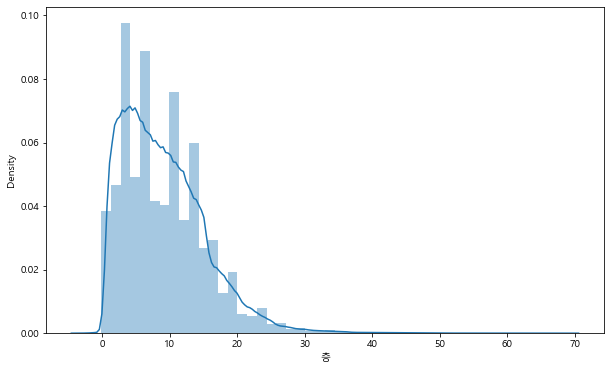

In [67]:
# 층 변수 분포 확인
# fig=plt.figure(figsize=(10, 5))
# plt.hist(train_data['층'],bins=50)
# plt.title('층 수 히스토그램')
# plt.xlabel('층 수')
# plt.show()

# 거래 가격 분포 확인
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(train_data["층"])

In [68]:
# 층 중 음수 개수 : 70개, 전체의 약 0.03%
sum(train_data['층']<=0)

70

In [69]:
# 층 중 음수 개수 확인
train_data.loc[train_data['층']<0,'층'].value_counts()

-1    52
-2    13
-3     5
Name: 층, dtype: int64

In [34]:
# # 이상치 처리 방법에 따른 로그 거래금액과의 correlation 확인 - 필요하면 사용

# # 음수가 아닌 층과 로그 거래금액의 상관계수 확인
# df_floor_above_0 =train_data.loc[train_data['층']>0,['층', '거래금액_로그']]
# delete_outlier_corr=round(np.corrcoef(df_floor_above_0['층'], df_floor_above_0['거래금액_로그'])[0,1],5) # 0.18714

# # 음수 층의 -를 제거해서 양수로 변환 
# floor_plus = [floor*(-1) if floor<0 else floor for floor in train_data['층'] ]
# # 로그 거래금액의 상관계수 확인
# replace_plus_corr=round(np.corrcoef(floor_plus, train_data['거래금액_로그'])[0,1],5)#0.18687

# # 음수 층을 모두 최저층인 1로 변환 
# floor_one = [1 if floor<0 else floor for floor in train_data['층'] ]
# # 로그 거래금액의 상관계수 확인
# replace_one_corr = round(np.corrcoef(floor_one, train_data['거래금액_로그'])[0,1],5) #0.18685

# # 층수의 평균값으로 변환
# floor_mean = [train_data['층'].mean() if floor<0 else floor for floor in train_data['층'] ]
# replace_mean_corr = round(np.corrcoef(floor_mean, train_data['거래금액_로그'])[0,1],5)

# # corr비교
# pd.DataFrame({'delete_outlier':[delete_outlier_corr], 'replace_plus':[replace_plus_corr],
#              'replace_one':[replace_one_corr],'replace_mean':[replace_mean_corr]}, index = ['correlation'])

# # 삭제 했을때가 가장 correlation이 높다

In [70]:
## 이상치 삭제
train_data.drop(train_data.loc[train_data['층']<0].index, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='층', ylabel='Density'>

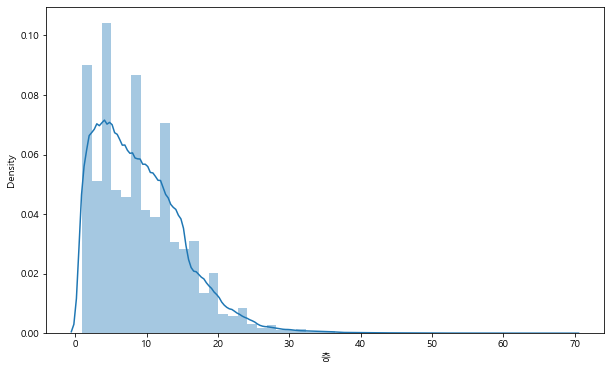

In [71]:
# 삭제 후 층 변수 분포
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(train_data["층"])

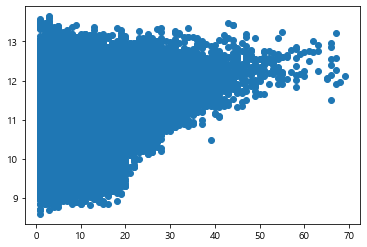

In [72]:
plt.scatter(train_data['층'],train_data['거래금액_로그'])

In [64]:
# pd.DataFrame(train_data['층'].value_counts()).transpose() # 10개 이하의 값들이 속한 층에 대해서도 삭제 고민(50층 이상. 초고층 아파트로 분류됌)

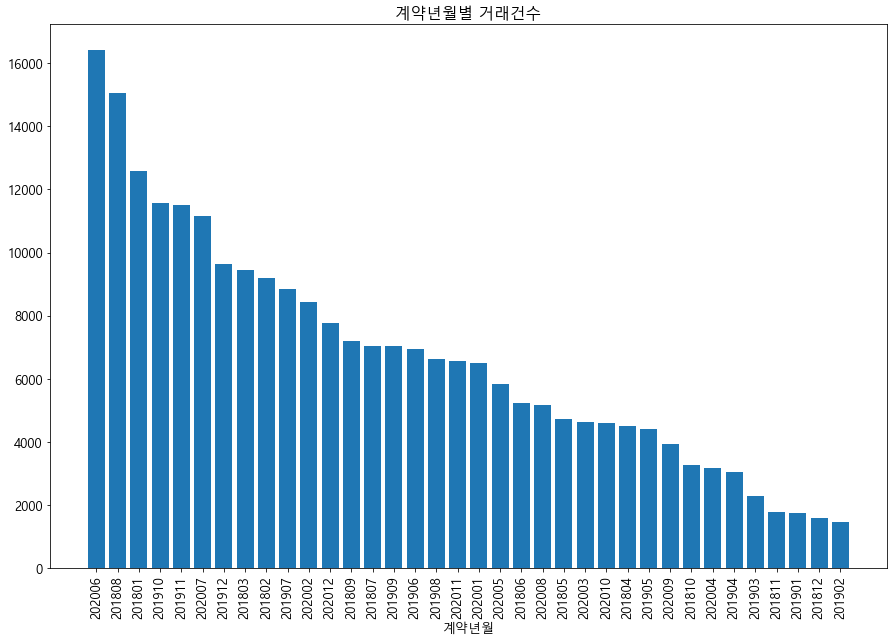

In [73]:
## 계약년월 변수 - 이상치로 판단할 값은 없는것으로 보임
train_data['계약년월'] = train_data['계약년월'].astype('str') # 시각화할때 int형으로 들어가면 숫자 간격이 동일하지 않아서 이상하게 출력됌
train_data_df_ym = pd.DataFrame(train_data['계약년월'].value_counts())
train_data_df_ym


plt.rc('font', size=13)
fig=plt.figure(figsize=(15, 10))
plt.bar(list(train_data_df_ym.index), train_data_df_ym['계약년월'])
plt.xticks(rotation='vertical')
plt.title('계약년월별 거래건수')
plt.xlabel('계약년월')
plt.show()

# plt.barh(train_data_df_ym.sort_index().index,train_data_df_ym.sort_index().iloc[:,0])



In [74]:
## 계약년월
# 계약년도와 계약월 컬럼 생성(EDA)
train_data['계약년도'] = train_data['계약년월'].map(lambda x : str(x)[:4])
train_data['계약월'] = train_data['계약년월'].map(lambda x : str(x)[4:])
train_data

,시군구,단지명,전용면적(㎡),계약년월,거래금액,층,건축년도,도로명,거래금액_로그,시,구,동,구_평균,top30_동,동_평균,scaled_거래금액,top10_시공사,top10_평균,top10_시공사_encode1,top10_시공사_encode2,top20_단지명,top20_단지명_mean,top20_단지명_encode1,top20_단지명_encode2,계약년도,계약월
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,11.669938,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.133717,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,11.845827,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.160676,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,03
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,11.585255,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.122334,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74,10.165890,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.024682,기타1,72015.621811,0.079817,0.079817,기타2,78536.363753,0.087630,0.087630,2020,08
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23,10.691968,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.046250,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,07
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23,10.911464,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.059190,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,12
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19,10.596660,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.041457,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,09


### 계약년월
- 인코딩 : 연속적이나 구간이 일정한 추세 t를 변수로 포함 https://be-favorite.tistory.com/86

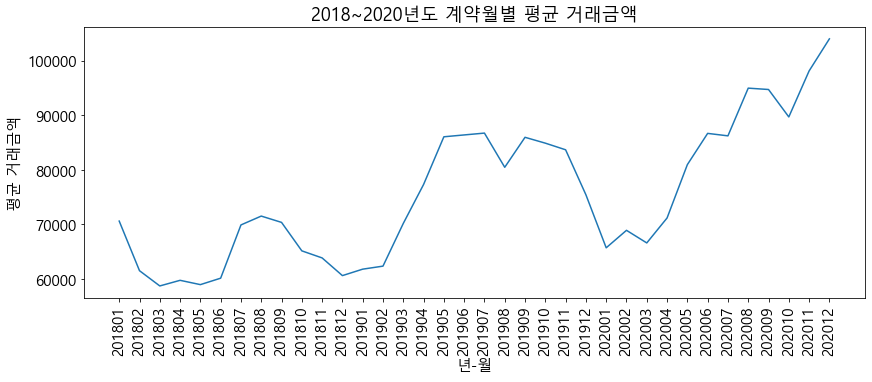

In [75]:
# 계약년월 별로 그룹화 후 평균 거래금액 산출 
train_data['계약년월'] = train_data['계약년월'].astype('str')
train_data_grouped_ym_mean = train_data.groupby(train_data['계약년월'])['거래금액'].mean()

# 시각화
plt.rc('font', size=15)
fig=plt.figure(figsize=(14, 5))
# plt.boxplot(train_data['계약년월'], train_data['거래금액'])
plt.plot(train_data_grouped_ym_mean)
plt.xticks(rotation='vertical')
plt.title('2018~2020년도 계약월별 평균 거래금액')
plt.xlabel('년-월')
plt.ylabel('평균 거래금액')
plt.show()

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['계약년월_인코딩'] = le.fit_transform(train_data['계약년월'])
train_data[['계약년월', '계약년월_인코딩']].value_counts()

계약년월    계약년월_인코딩
202006  29          16410
201808  7           15044
201801  0           12582
201910  21          11580
201911  22          11506
202007  30          11161
201912  23           9625
201803  2            9434
201802  1            9185
201907  18           8836
202002  25           8418
202012  35           7765
201809  8            7209
201807  6            7038
201909  20           7031
201906  17           6929
201908  19           6618
202011  34           6575
202001  24           6504
202005  28           5843
201806  5            5247
202008  31           5177
201805  4            4710
202003  26           4636
202010  33           4602
201804  3            4500
201905  16           4414
202009  32           3946
201810  9            3270
202004  27           3169
201904  15           3049
201903  14           2281
201811  10           1776
201901  12           1730
201812  11           1593
201902  13           1458
dtype: int64

In [127]:
# df_dong_cnt_mean=pd.DataFrame({'cnt':train_data['층'].value_counts(), 'mean':train_data.groupby('층').mean()['거래금액']})
# plt.scatter(df_dong_cnt_mean['cnt'], df_dong_cnt_mean['mean'] )

### 전용면적 컬럼
- 결측지 제거
- 값 그대로/로그변환/50단위 나눠 인코딩

In [77]:
train_data.rename(columns = {'전용면적(㎡)':'전용면적'}, inplace=True)
train_data

,시군구,단지명,전용면적,계약년월,거래금액,층,건축년도,도로명,거래금액_로그,시,구,동,구_평균,top30_동,동_평균,scaled_거래금액,top10_시공사,top10_평균,top10_시공사_encode1,top10_시공사_encode2,top20_단지명,top20_단지명_mean,top20_단지명_encode1,top20_단지명_encode2,계약년도,계약월,계약년월_인코딩
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,11.669938,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.133717,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,11.845827,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.160676,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,03,2
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,11.585255,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.122334,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,04,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74,10.165890,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.024682,기타1,72015.621811,0.079817,0.079817,기타2,78536.363753,0.087630,0.087630,2020,08,31
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23,10.691968,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.046250,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,07,30
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23,10.911464,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.059190,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,12,35
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19,10.596660,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.041457,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,09,32


(300.0, 400.0)

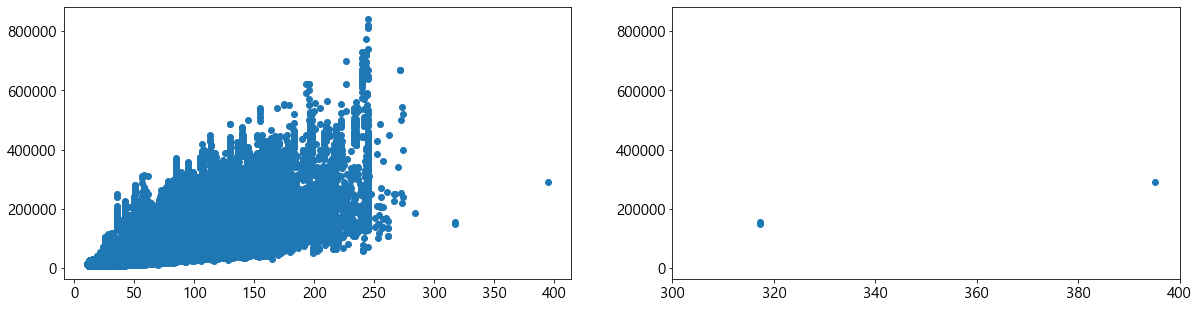

In [78]:
#거래금액 - 전용면적 분포도 확인 (12/26)
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.scatter(train_data['전용면적'],train_data['거래금액'])

plt.subplot(1, 2, 2)
plt.scatter(train_data['전용면적'],train_data['거래금액'])
plt.xlim([300,400])#max=395.06

In [79]:
#결측치 제거하기
train_data.drop(train_data.loc[train_data['전용면적']>300].index, inplace=True)
train_data

,시군구,단지명,전용면적,계약년월,거래금액,층,건축년도,도로명,거래금액_로그,시,구,동,구_평균,top30_동,동_평균,scaled_거래금액,top10_시공사,top10_평균,top10_시공사_encode1,top10_시공사_encode2,top20_단지명,top20_단지명_mean,top20_단지명_encode1,top20_단지명_encode2,계약년도,계약월,계약년월_인코딩
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,11.669938,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.133717,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,11.845827,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.160676,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,03,2
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,11.585255,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.122334,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,04,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74,10.165890,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.024682,기타1,72015.621811,0.079817,0.079817,기타2,78536.363753,0.087630,0.087630,2020,08,31
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23,10.691968,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.046250,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,07,30
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23,10.911464,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.059190,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,12,35
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19,10.596660,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.041457,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,09,32


In [80]:
train_data['전용면적'].describe()

count    240848.000000
mean         77.919736
std          30.374876
min          10.321500
25%          59.720000
50%          83.420000
75%          84.970000
max         283.760000
Name: 전용면적, dtype: float64

In [81]:
#로그변환
train_data['전용면적_log']=np.log1p(train_data['전용면적'])
train_data

,시군구,단지명,전용면적,계약년월,거래금액,층,건축년도,도로명,거래금액_로그,시,구,동,구_평균,top30_동,동_평균,scaled_거래금액,top10_시공사,top10_평균,top10_시공사_encode1,top10_시공사_encode2,top20_단지명,top20_단지명_mean,top20_단지명_encode1,top20_단지명_encode2,계약년도,계약월,계약년월_인코딩,전용면적_log
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0,4.394079
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,11.669938,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.133717,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0,4.394079
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0,4.394079
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,11.845827,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.160676,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,03,2,4.394079
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,11.585255,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.122334,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,04,3,4.024994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74,10.165890,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.024682,기타1,72015.621811,0.079817,0.079817,기타2,78536.363753,0.087630,0.087630,2020,08,31,4.227855
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23,10.691968,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.046250,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,07,30,4.574092
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23,10.911464,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.059190,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,12,35,4.616802
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19,10.596660,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.041457,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,09,32,4.365770


In [82]:
#10단위로 29구간 인코딩 (10~290)
labels=list(range(1,30))
train_data['전용면적_10']=pd.cut(train_data['전용면적'],
                                bins=29, labels=labels, include_lowest=True)
train_data

,시군구,단지명,전용면적,계약년월,거래금액,층,건축년도,도로명,거래금액_로그,시,구,동,구_평균,top30_동,동_평균,scaled_거래금액,top10_시공사,top10_평균,top10_시공사_encode1,top10_시공사_encode2,top20_단지명,top20_단지명_mean,top20_단지명_encode1,top20_단지명_encode2,계약년도,계약월,계약년월_인코딩,전용면적_log,전용면적_10
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0,4.394079,8
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,11.669938,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.133717,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0,4.394079,8
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0,4.394079,8
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,11.845827,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.160676,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,03,2,4.394079,8
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,11.585255,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.122334,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,04,3,4.024994,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74,10.165890,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.024682,기타1,72015.621811,0.079817,0.079817,기타2,78536.363753,0.087630,0.087630,2020,08,31,4.227855,7
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23,10.691968,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.046250,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,07,30,4.574092,10
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23,10.911464,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.059190,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,12,35,4.616802,10
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19,10.596660,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.041457,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,09,32,4.365770,8


In [83]:
train_data['전용면적_10'].value_counts()

8     85734
6     58176
5     15600
12    14924
4     13653
7      9576
3      5994
11     5390
10     5319
1      4778
14     4388
13     4357
2      2491
15     2231
9      2220
17     1675
16     1530
18      689
19      456
20      382
25      310
22      288
21      255
24      215
23      174
26       15
27       14
28       13
29        1
Name: 전용면적_10, dtype: int64

In [84]:
train_data['전용면적'].value_counts().sort_values(ascending=False)

84.96     4555
84.98     4417
84.97     4409
84.99     4406
59.99     3005
          ... 
34.26        1
20.38        1
95.53        1
150.38       1
95.94        1
Name: 전용면적, Length: 10815, dtype: int64

### 건축년도

In [86]:
train_data['건축년도'].describe()

count    240848.000000
mean       2000.224893
std           9.664883
min        1961.000000
25%        1994.000000
50%        2001.000000
75%        2007.000000
max        2021.000000
Name: 건축년도, dtype: float64

In [87]:
#건축년도 변수-가장 작은 건축년도 = 값으로 인코딩
train_data['건축년도_min_차이']=train_data['건축년도']-train_data['건축년도'].min()
train_data

,시군구,단지명,전용면적,계약년월,거래금액,층,건축년도,도로명,거래금액_로그,시,구,동,구_평균,top30_동,동_평균,scaled_거래금액,top10_시공사,top10_평균,top10_시공사_encode1,top10_시공사_encode2,top20_단지명,top20_단지명_mean,top20_단지명_encode1,top20_단지명_encode2,계약년도,계약월,계약년월_인코딩,전용면적_log,전용면적_10,건축년도_min_차이
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0,4.394079,8,26
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,11.669938,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.133717,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0,4.394079,8,26
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0,4.394079,8,26
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,11.845827,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.160676,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,03,2,4.394079,8,26
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,11.585255,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.122334,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,04,3,4.024994,5,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74,10.165890,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.024682,기타1,72015.621811,0.079817,0.079817,기타2,78536.363753,0.087630,0.087630,2020,08,31,4.227855,7,42
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23,10.691968,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.046250,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,07,30,4.574092,10,46
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23,10.911464,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.059190,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,12,35,4.616802,10,46
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19,10.596660,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.041457,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,09,32,4.365770,8,46


In [88]:
#5단위로 13구간 인코딩 (1961~2021)
#5단위로 12구간 인코딩 (1961~2020)시 60구간이라 더 효과적일수도 있음
labels=list(range(1,14))
train_data['건축년도_5']=pd.cut(train_data['건축년도'],
                                bins=13, labels=labels, include_lowest=True)
train_data

,시군구,단지명,전용면적,계약년월,거래금액,층,건축년도,도로명,거래금액_로그,시,구,동,구_평균,top30_동,동_평균,scaled_거래금액,top10_시공사,top10_평균,top10_시공사_encode1,top10_시공사_encode2,top20_단지명,top20_단지명_mean,top20_단지명_encode1,top20_단지명_encode2,계약년도,계약월,계약년월_인코딩,전용면적_log,전용면적_10,건축년도_min_차이,건축년도_5
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0,4.394079,8,26,6
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,11.669938,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.133717,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0,4.394079,8,26,6
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0,4.394079,8,26,6
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,11.845827,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.160676,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,03,2,4.394079,8,26,6
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,11.585255,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.122334,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,04,3,4.024994,5,26,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74,10.165890,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.024682,기타1,72015.621811,0.079817,0.079817,기타2,78536.363753,0.087630,0.087630,2020,08,31,4.227855,7,42,10
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23,10.691968,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.046250,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,07,30,4.574092,10,46,10
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23,10.911464,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.059190,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,12,35,4.616802,10,46,10
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19,10.596660,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.041457,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,09,32,4.365770,8,46,10


In [89]:
train_data['건축년도_5'].value_counts()

9     50349
10    48672
8     26673
7     24205
11    23789
6     23233
12    22442
13     9524
5      6284
4      3878
3      1414
2       365
1        20
Name: 건축년도_5, dtype: int64

In [90]:
#13개의 구간으로 인코딩된 건축년도_cut과
#각 구간별 평균 거래금액 기준으로 rank 부여한 컬럼 생성하여 가중치 컬럼 생성
mean_data=train_data.groupby('건축년도_5').mean()['거래금액']
mean_data

건축년도_5
1      22515.000000
2      42976.268493
3     122536.694484
4     164826.097989
5     130564.042011
6      72105.802651
7      56603.437596
8      60127.968208
9      65892.955729
10     78642.406188
11    101260.993358
12     89286.735229
13     83039.326333
Name: 거래금액, dtype: float64

In [91]:
rank_data=mean_data.rank()
rank_data

건축년도_5
1      1.0
2      2.0
3     11.0
4     13.0
5     12.0
6      6.0
7      3.0
8      4.0
9      5.0
10     7.0
11    10.0
12     9.0
13     8.0
Name: 거래금액, dtype: float64

In [92]:
train_data

,시군구,단지명,전용면적,계약년월,거래금액,층,건축년도,도로명,거래금액_로그,시,구,동,구_평균,top30_동,동_평균,scaled_거래금액,top10_시공사,top10_평균,top10_시공사_encode1,top10_시공사_encode2,top20_단지명,top20_단지명_mean,top20_단지명_encode1,top20_단지명_encode2,계약년도,계약월,계약년월_인코딩,전용면적_log,전용면적_10,건축년도_min_차이,건축년도_5
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0,4.394079,8,26,6
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,11.669938,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.133717,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0,4.394079,8,26,6
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0,4.394079,8,26,6
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,11.845827,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.160676,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,03,2,4.394079,8,26,6
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,11.585255,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.122334,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,04,3,4.024994,5,26,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74,10.165890,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.024682,기타1,72015.621811,0.079817,0.079817,기타2,78536.363753,0.087630,0.087630,2020,08,31,4.227855,7,42,10
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23,10.691968,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.046250,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,07,30,4.574092,10,46,10
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23,10.911464,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.059190,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,12,35,4.616802,10,46,10
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19,10.596660,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.041457,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,09,32,4.365770,8,46,10


In [93]:
train_data['건축년도_5_rank']=0
for i in range(0,13):
    index=train_data['건축년도_5'].loc[train_data['건축년도_5']==(i+1)].index
    train_data['건축년도_5_rank'].loc[index]=rank_data[i]
# encoding_data[['건축년도_5', '건축년도_5_rank']].loc[encoding_data['건축년도_5']==5] #컬럼별 잘 들어갔는지 확인
train_data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,시군구,단지명,전용면적,계약년월,거래금액,층,건축년도,도로명,거래금액_로그,시,구,동,구_평균,top30_동,동_평균,scaled_거래금액,top10_시공사,top10_평균,top10_시공사_encode1,top10_시공사_encode2,top20_단지명,top20_단지명_mean,top20_단지명_encode1,top20_단지명_encode2,계약년도,계약월,계약년월_인코딩,전용면적_log,전용면적_10,건축년도_min_차이,건축년도_5,건축년도_5_rank
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0,4.394079,8,26,6,6
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,11.669938,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.133717,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0,4.394079,8,26,6,6
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0,4.394079,8,26,6,6
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,11.845827,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.160676,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,03,2,4.394079,8,26,6,6
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,11.585255,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.122334,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,04,3,4.024994,5,26,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74,10.165890,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.024682,기타1,72015.621811,0.079817,0.079817,기타2,78536.363753,0.087630,0.087630,2020,08,31,4.227855,7,42,10,7
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23,10.691968,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.046250,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,07,30,4.574092,10,46,10,7
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23,10.911464,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.059190,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,12,35,4.616802,10,46,10,7
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19,10.596660,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.041457,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,09,32,4.365770,8,46,10,7


In [94]:
train_data

,시군구,단지명,전용면적,계약년월,거래금액,층,건축년도,도로명,거래금액_로그,시,구,동,구_평균,top30_동,동_평균,scaled_거래금액,top10_시공사,top10_평균,top10_시공사_encode1,top10_시공사_encode2,top20_단지명,top20_단지명_mean,top20_단지명_encode1,top20_단지명_encode2,계약년도,계약월,계약년월_인코딩,전용면적_log,전용면적_10,건축년도_min_차이,건축년도_5,건축년도_5_rank
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0,4.394079,8,26,6,6
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3,11.669938,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.133717,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0,4.394079,8,26,6,6
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3,11.775297,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.149293,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,01,0,4.394079,8,26,6,6
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3,11.845827,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.160676,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,03,2,4.394079,8,26,6,6
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3,11.585255,서울특별시,강남구,개포동,1.000000,개포동,0.458209,0.122334,기타1,72015.621811,0.079817,0.079817,우성,78820.868753,0.087971,0.154972,2018,04,3,4.024994,5,26,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74,10.165890,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.024682,기타1,72015.621811,0.079817,0.079817,기타2,78536.363753,0.087630,0.087630,2020,08,31,4.227855,7,42,10,7
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23,10.691968,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.046250,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,07,30,4.574092,10,46,10,7
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23,10.911464,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.059190,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,12,35,4.616802,10,46,10,7
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19,10.596660,서울특별시,중랑구,중화동,0.030539,기타,0.000000,0.041457,기타1,72015.621811,0.079817,0.079817,현대,80762.798661,0.090298,0.110988,2020,09,32,4.365770,8,46,10,7


In [ ]:
#13개의 구간으로 인코딩된 건축년도_cut과
#각 구간별 평균 거래금액 기준으로 rank 부여한 컬럼 생성하여 가중치 컬럼 생성

# 데이터 처리

In [103]:
train_data.columns = ['sigungu', 'danji', 'area', 'transaction_yearmonth', 'price', 'floor', 'year_of_completion', 'doro',
 'price_log', 'si', 'gu', 'dong', 'gu_ec_price', 'top30_dong', 'dong_ec_price',
  'scaled_price', 'top10_brand','top10_brand_mean', 'top10_brand_ec1_price', 'top10_brand_ec2_price', 'top20_danji', 'top20_danji_mean', 'top20_danji_ec1_price', 'top20_danji_ec2_price', 
  'year', 'month', 'transaction_year_month_ec', 'area_log', 'area_10', 'completion_year_min_diff', 'completion_year_5', 'completion_year_5_rank']

In [106]:
train_data.to_csv('temp.csv')

In [107]:
standard_dataset = train_data[['area', 'floor', 'year_of_completion', 'price_log', 'gu_ec_price', 'top10_brand_ec2_price', 'top20_danji_ec2_price', 'transaction_year_month_ec']]

In [108]:
standard_dataset.to_csv('standard_dataset.csv')